# CERI 8211 Introduction to Global Geophysics:

## Homework 2

### Due in class on Wednesday, Feb. 12th, 2025

## 1.) Read the Wikipedia article on Cavendish’s experiment for determining G, the gravitational constant, and summarize the main points. Your description should include three parts:

(a) (3 points) the fundamental force balance equation,

(b) (2 points) an expression for the torsion coefficient in terms of measurable quantities

(c) (2 points) the final expression for G in terms of measurable quantities

## ANSWER

The Cavendish experiemnt was done to measure the force of gravity and the first to have an accurate value for G. A simple version is a bar with two small balls hanging on a torsion wire with larger balls along the circle path of the smaller balls. 

It started with calculating with the k(hteta) = L*F. This shows is the equation for the balls on the torsion wire from the experiment, where F is the force of the universal gravitation, L is twice the distance from the axis of balance, and the k(theta) is the torsion coefficient. 

The torsion coefficient is found from hookes law and the measured natural resonant oscillation period T. T = 2*pi *sqrt(I/k) is the exact equation, where I in is the moment of inertia. The moment of inertia is assusmed that the mass of the torsion beam is negligible, so the interia is only counted for the small balls. I = (m*L^2)/2. In the end, T = 2*pi*sqrt(m*L**2/2*k). 

When you take all the we solved and add it to the original formula, we find that G =((2*pi**2)*L*r**2*theta)/(M*T**2). For measurable formualas, L again is twice the length of the distance from the axis of balance,r in distance between the balls, theta is the angle of how much the small balls goes towards the large balls. M is the mass of the larger ball. T is the torsion coeeficient mentioned eariler. 

## 2.) The surface gravity at a measuring site is 9.803243 m s**−2. The site has a latitude 43◦32′16′′N and an elevation of 542.3 m. Obtain the free-air and Bouguer gravity anomalies. Ignore the tidal and terrain corrections.

In [5]:
#imports 
import numpy as np
import geopy.distance
#givens
elevation = 542.3 / 1000  #in kilometers
g = 9.803243 
g0 = 9.81 #at sealever
latdegrees = 43
latmin = 32/60
latsec = 16/3600
r = 6371 #radius of earth in km
G = 6.67e-11
lat = latdegrees + latmin + latsec
rho = 2.7e3 # average crustal density
coords_1 = (0, 0)
coords_2 = (lat, 0)
latdist = geopy.distance.geodesic(coords_1, coords_2).km #km for lat correction

#lat correction 
glc = (.8140 * np.sin(2* lat) * latdist)/100000 # divide to convert to m/s**2
# Freeair and lat
dfa = (2 * elevation / r) * g0
gfa = g - (glc* (1 - (2 * elevation) / r )) # equation from Fowler 2006
# bouguer and lat 
dBp= 2 * np.pi * G * rho * elevation
gBp = g - dBp

In [6]:
print(f'The Bouguer anomaly accounting for latitude is {gBp}')
print(f'The Free Air anomaly accounting for latitude is {gfa}' ) 
print('See the Bouguer is closed to measured and the Free Air goes up, it looks like it MAY be 0% compensation, but need more points to confirm')

The Bouguer anomaly accounting for latitude is 9.803242386366486
The Free Air anomaly accounting for latitude is 9.833717899139872
See the Bouguer is closed to measured and the Free Air goes up, it looks like it MAY be 0% compensation, but need more points to confirm


## 3.) Qualitatively describe the profiles of geoid, free-air gravity and Bouguer gravity over the mantle plumes in the two cases depicted in Fig. 1. Make sure to read Sec. 5.6.2 of Fowler (2005) available on Canvas before answering.

![title](Mantleplume.png)

1.) With A, without the increased elevation, the geoid is slightly negative due to the low denisty anomaly, The geoid of B is increased above the hot plume if we assume the density of the deformed mantle height make a greater contribution then the low density plume, as the book does. 

2.) For the free-air anomaly, in A the area above the mantle plume would be negative around the less dense hot plume. It would decrease from the "0" starting from the far sides until you reach the center. This is because there is no height compensation, so the delta for the Fa is 0. For B, the mass above is adds more density that the less dense underground, according to Fowlers 2005, so it would decrease until you get reach to plume and uplift area then it will be positive over that area, most likely with a positive hyperbola shape (slight less in the middle than the edges). Hyptheritcally I could see a low density and the high density area with a particular shape with the deformed crust and size could even register as a 0 anomaly change, but that would not happen with the book assumption. 

3.) For the Bouguer anomally, for A it would be negative as well, since there is no dense mass with height to add, but there is still a low dense body underneith. For B the height/density area is accounted for in the equation, so the anomally again will look like a negative value anomaly. 

## 4.) We want to model the free-air gravity anomaly across the southeastern coast of Australia (Fig. 2a) using a simple model introduced in Sec. 2.6.3.5 of Lowrie (2007) (Fig. 2b).

(a) (2 points) Calculate t (see Fig. 2b), the thickness of crust above seafloor, using the Airy isostary. 

In practice, you can equate the pressure at the bottom of crust (ρc g H) with the sum of sea water pressure (ρw g t) and mantle pressure (ρm g (H − t)) at the same depth, where ρc, ρw, and ρm are density of crust, sea water and mantle; and H is the total crustal thickness of 30 km. Write down the expression for t using the provided symbols and also provide the value of t for densities and H values annotated on (see Fig. 2b).

(b) (2 points) Following the reasoning in Sec. 2.6.3.5 of Lowrie (2007), we represent crustal layers above and below the seafloor as two separate thin sheet anomalies located at the middle depth of each portion. 

Write down the expressions for gravity anomaly due to each of the ‘above’ and ‘below’ thin sheets, ∆gabove and ∆gbelow, using the equation (2.101) of Lowrie (2007). Make sure to use only the symbols already introduced in this problem.

(c) (2 points) Plot ∆gnet = ∆gabove + ∆gbelow, for a distance range, −500 km ≤ x ≤ 500 km. This plot and the following must be created with one of the Python plotting libraries. The plots and plotting codes must be submitted to the dropbox on Canvas with as a single Jupyter notebook.

(d) (3 points) Plot ∆gnet for ρc=2600, 2700 and 2800 kg/m3. When a parameter is changed, the original values given in Fig. 2b should be used for all the others. Also, t needs to be recalculated for each case.

(e) (3 points) Plot ∆gnet for ρm = 3200, 3300 and 3400 kg/m3.

(f) (3 points) Plot ∆gnet for the H = 25, 30 and 35 km

![title](Freeair.png)

In [192]:
#a.) find the thickness of the crust about the sea floor 
#givens 
rhosw = 1030 # all density in kg/m**3
rhomantle = 3330 
rhocrust26 = 2600
rhocrust27 = 2700
rhocrust28 = 2800
rhocrust32 = 3200
rhocrust33 = 3300
rhocrust34 = 3400
H25 = 25
H30 = 30
H35 = 35
t27 = (H30 * (rhocrust27 - rhomantle))/(rhosw-rhomantle)
print(f'The value of t, the height of the seawater, is {t27}')


The value of t, the height of the seawater, is 8.217391304347826


#b
Equation 2.101 is delta(g) = 2*G*delta(rho)*h(pi/2 + arctan(x/z0))
and I am assuming the anomalies are directly inbetween the H-t and t 

The equation of the above and below thin sheet anomalys will be: 
∆gabove = 2 * G * (rhosw-rhocrust) * t * (pi/2 + arctan(x/(t/2)))
∆gbelow =  2 * G * (rhomantle-rhocrust) * H * (pi/2 + arctan(x/(H-t/2)))

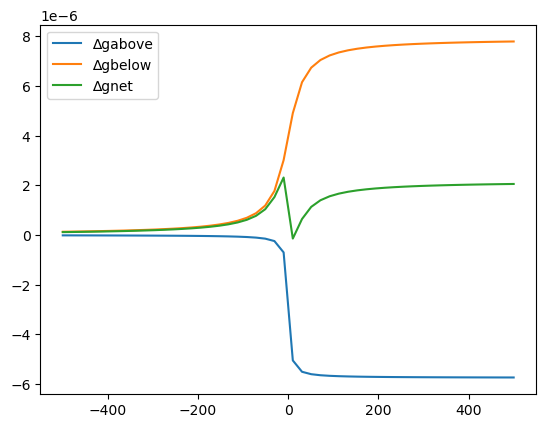

In [195]:
#c
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11
x = np.linspace(-500,500)

gabove27 = 2 * G * (rhosw-rhocrust27) * t27 * (np.pi/2 + np.arctan(x/(t27/2)))
gbelow27 = 2 * G * (rhomantle-rhocrust27) * H30 * (np.pi/2 + np.arctan(x/(H30-t27/2)))
deltag27 = gabove27 + gbelow27
plt.plot(x,gabove27,label = "∆gabove")
plt.plot(x,gbelow27, label = "∆gbelow")
plt.plot(x,deltag27, label = "∆gnet") 
plt.legend()
plt.show()

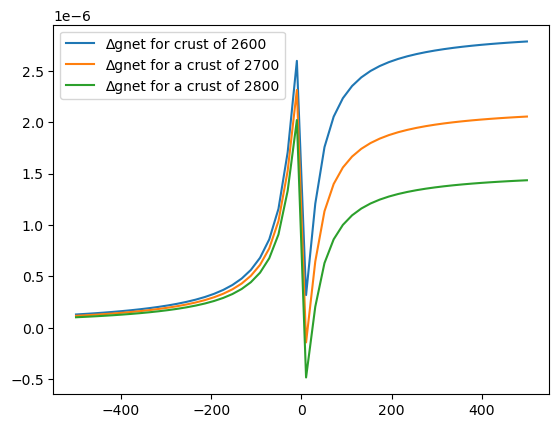

In [199]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11
x = np.linspace(-500,500)

t26 = (H30 * (rhocrust26 - rhomantle))/(rhosw-rhomantle)
t28 = (H30 * (rhocrust28 - rhomantle))/(rhosw-rhomantle)
gabove26 = 2 * G * (rhosw-rhocrust26) * t26 * (np.pi/2 + np.arctan(x/(t26/2)))
gbelow26 = 2 * G * (rhomantle-rhocrust26) * H30 * (np.pi/2 + np.arctan(x/(H30-t26/2)))
deltag26 = gabove26 + gbelow26
gabove28 = 2 * G * (rhosw-rhocrust28) * t28 * (np.pi/2 + np.arctan(x/(t28/2)))
gbelow28 = 2 * G * (rhomantle-rhocrust28) * H30 * (np.pi/2 + np.arctan(x/(H30-t28/2)))
deltag28 = gabove28 + gbelow28
plt.plot(x,deltag26, label = "∆gnet for crust of 2600") 
plt.plot(x,deltag27, label = "∆gnet for a crust of 2700") 
plt.plot(x,deltag28,label = "∆gnet for a crust of 2800") 
plt.legend()
plt.show()

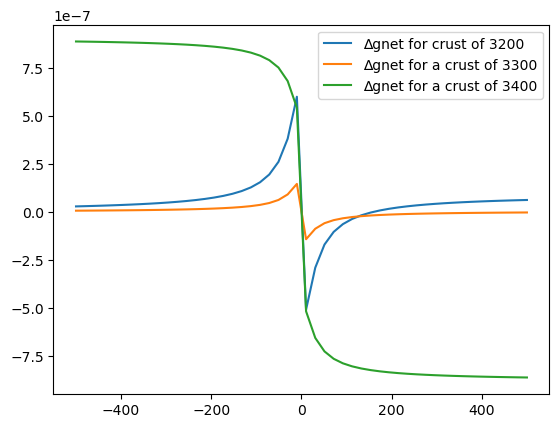

In [203]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11
x = np.linspace(-500,500)

t32 = (H30 * (rhocrust32 - rhomantle))/(rhosw-rhomantle)
t33 = (H30 * (rhocrust33 - rhomantle))/(rhosw-rhomantle)
t34 = (H30 * (rhocrust34 - rhomantle))/(rhosw-rhomantle)
gabove32 = 2 * G * (rhosw-rhocrust32) * t32 * (np.pi/2 + np.arctan(x/(t32/2)))
gbelow32 = 2 * G * (rhomantle-rhocrust32) * H30 * (np.pi/2 + np.arctan(x/(H30-t32/2)))
deltag32 = gabove32 + gbelow32

gabove33 = 2 * G * (rhosw-rhocrust33) * t33 * (np.pi/2 + np.arctan(x/(t33/2)))
gbelow33 = 2 * G * (rhomantle-rhocrust33) * H30 * (np.pi/2 + np.arctan(x/(H30-t33/2)))
deltag33 = gabove33 + gbelow33

gabove34 = 2 * G * (rhosw-rhocrust34) * t34 * (np.pi/2 + np.arctan(x/(t34/2)))
gbelow34 = 2 * G * (rhomantle-rhocrust34) * H30 * (np.pi/2 + np.arctan(x/(H30-t34/2)))
deltag34 = gabove34 + gbelow34
plt.plot(x,deltag32, label = "∆gnet for crust of 3200") 
plt.plot(x,deltag33, label = "∆gnet for a crust of 3300") 
plt.plot(x,deltag34,label = "∆gnet for a crust of 3400") 
plt.legend()
plt.show()

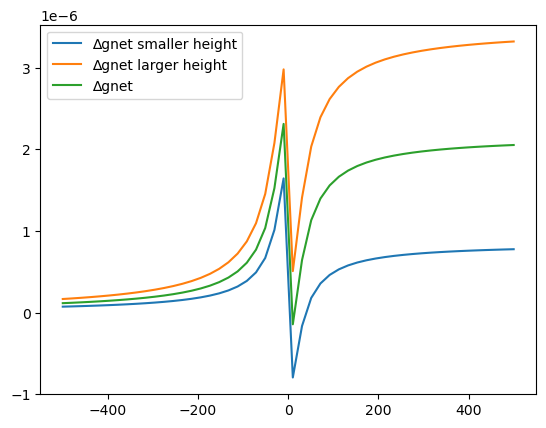

In [205]:
#d
gabove27 = 2 * G * (rhosw-rhocrust27) * t27 * (np.pi/2 + np.arctan(x/(t27/2)))
gbelow27hs = 2 * G * (rhomantle-rhocrust27) * H25 * (np.pi/2 + np.arctan(x/(H25-t27/2)))
gbelow27hl = 2 * G * (rhomantle-rhocrust27) * H35 * (np.pi/2 + np.arctan(x/(H35-t27/2)))
deltag27hs = gabove27 + gbelow27hs
deltag27hl = gabove27 + gbelow27hl
plt.plot(x,deltag27hs, label = "∆gnet smaller height") 
plt.plot(x,deltag27hl, label = "∆gnet larger height") 
plt.plot(x,deltag27, label = "∆gnet") 
plt.legend()
plt.show()

## 5. Go to the global gravity field models web page of International Centre for Global Earth Models (ICGEM), http://icgem.gfz-potsdam.de/tom_longtime, to download the gravity field coefficient file (.gfc) of the latest model, WHU-SWPU-GOGR2022S.
### Some Notes:
• Radial-dependence is already included in the coefficients. It is sufficient to do the summation over degrees and orders at selected colatitudes and longitudes.

• Use SciPy’s spherical harmonics in the calculation.

• Visualize the result using one of the Python plotting libraries: e.g., matplotlib, pyGMT, plotly, etc.

• Your work for parts (b) and (c) should be uploaded to the dropbox on Canvas as a single Jupyter Notebook.

• It is not required but strongly recommended to incorporate part (a) as markdown cells in the notebook.

(a) (5 points) Briefly describe the GOCE and GRACE satellite systems based on the materials on https://earth.esa.int/eogateway/missions/goce/description and https://www2.csr.utexas.edu/grace/GRACE_Edu_Poster/page_03.pdf.

(b) (10 points) Calculate and plot a global gravity anomaly map using the WHU-SWPU-GOGR2022S coefficients up to degree 10. You would want to start the summation from degree 2.

![title](informationshortcut.png)


(c) (5 points) Change the maximum degree to 60 and plot the results. Briefly comment on the differences from the degree 10 map.

(d) (3 points) Use this online tool, https://icgem.gfz-potsdam.de/calcpoints to calculate the geoid undulation from the EGM2008 model at Memphis. Submit the result data file downloaded from the calculation system.

## Answer
a.) GOCE was a low orbit satilite that can take measurements of earths gravity. Having a satalite in low orbit takes a low of time and money, so data was only collected for 20 months. This mission was the first ever Earth Explorer mission to be launched. GOCE has measures the ocean speeds. It delievered the most accurate model of Earth's geoid ever. It also had the first seismometer in orbit that detected sound waves from the massive earthquake that hit Japan in 2011. 
GRACE was difference since it used a twin satilite system to map the gravitial difference between the two. When there is gravitial disturbances, it affects the orbit between the two satilites, which is detected. The accurateness of these changes are within microns and their GPS system was also precise, so we could get an accurate gravitational anomly map of the earth. 


In [7]:
#b.) 
import pandas as pd
import numpy as np

df = pd.read_csv('WHU-SWPU-GOGR2022S.gfc', sep='\s+') 
listlength = len(df['M'])
C = np.zeros((301,301))
S = np.zeros((301,301))
for num in range(listlength):
    i = df['L'][num]
    j = df['M'][num]
    C[i,j] = df['C'][num]
    S[i,j] = df['S'][num]

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6472/2365384550.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('WHU-SWPU-GOGR2022S.gfc', sep='\s+')


In [9]:
def delta_eq(N,phi,theta,C,S):
    sumend = 0 
    for n in range(3,N+1):
        inner = 0 
        for m in range(0,n+1):
            Y = scipy.special.sph_harm_y(n, m, theta, phi)
            Y_real = Y.real
            Y_im = Y.imag
            Cint = C[n,m]
            Sint = S[n,m]
            inner += ((Y_real * Cint) + (Y_im * Sint))
        sumend += (n - 1) * inner
    deltag = sumend
    return(deltag)

In [11]:
import scipy.special
import numpy as np

lat_range = np.arange(-90,91,1)
lon_range = np.arange(-180,181,1)

deltag = np.zeros((len(lat_range), len(lon_range)))
for i,lat in enumerate(lat_range):
    theta = np.radians(90-lat)
    for j,lon in enumerate(lon_range):
        phi = np.radians(lon+180)
        deltag[i,j] = delta_eq(10,phi,theta,C,S)
        

In [12]:
#lon_range +180

/tmp/ipykernel_6472/255862046.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ma.pcolormesh(x, y, deltag, cmap='jet')


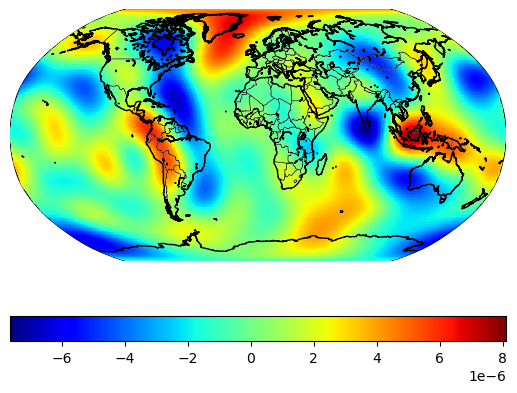

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
ma = Basemap(projection='robin', lon_0=0, resolution='l')
ma.drawcountries(color='#ffffff', linewidth=0.5)
ma.drawcoastlines()
ma.drawcountries()
lons, lats = np.meshgrid(lon_range, lat_range)
x, y = ma(lons, lats)
ma.pcolormesh(x, y, deltag, cmap='jet')
plt.colorbar(location = 'bottom')
plt.show()

In [146]:
#C
import scipy.special
import numpy as np

lat_range = np.arange(-90,91,1)
lon_range = np.arange(-180,181,1)

deltag = np.zeros((len(lat_range), len(lon_range)))
for i,lat in enumerate(lat_range):
    theta = np.radians(90-lat)
    for j,lon in enumerate(lon_range):
        phi = np.radians(lon+180)
        deltag[i,j] = delta_eq(60,phi,theta,C,S)

/tmp/ipykernel_6472/255862046.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ma.pcolormesh(x, y, deltag, cmap='jet')


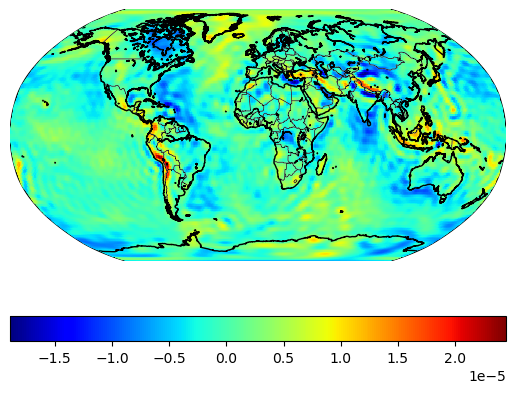

In [147]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
ma = Basemap(projection='robin', lon_0=0, resolution='l')
ma.drawcountries(color='#ffffff', linewidth=0.5)
ma.drawcoastlines()
ma.drawcountries()
lons, lats = np.meshgrid(lon_range, lat_range)
x, y = ma(lons, lats)
ma.pcolormesh(x, y, deltag, cmap='jet')
plt.colorbar(location = 'bottom')
plt.show()

## Answer
There is a huge difference between only using degree 3-10 and going from 3-60. You can see so much detail with the more degrees you add to the equation. The constraints around the high positive anomaly around western South America can see clearly where this high anomaly is located instead of a general high seen in the lesser degrees. also the northern mid-ocean ridge is visible and you lose that large positive anomaly around Greenland to a more detailed mix. I find it really intresting that you can also see the high positive anomly on the northern edge of the India/China border, almost following the border line. 

In [158]:
#C the website does not allow so many points, so I am extending to every 2 degrees for lat/long
import scipy.special
import numpy as np

lat_range = np.arange(-90,91,2)
lon_range = np.arange(-180,181,2)

deltag = np.zeros((len(lat_range), len(lon_range)))
lat_list = []
lon_list = []
count = 0
for i,lat in enumerate(lat_range):
    theta = np.radians(90-lat)
    for j,lon in enumerate(lon_range):
        phi = np.radians(lon+180)
        deltag[i,j] = delta_eq(60,phi,theta,C,S)
        lon_list.append(lon)
        lat_list.append(lat)
    count += 1

In [168]:
deltagpoints= deltag.flatten().tolist()

In [170]:
newmatrix= np.column_stack((lat_list,lon_list))

In [174]:
newmatrix= np.column_stack((newmatrix, deltagpoints))

In [176]:
np.savetxt('deltag_points.txt',newmatrix)